In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import math
import os #<- package used to work with system file paths
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- another package used to plot graphs
from itertools import cycle #<- package used to iterate down rows (used in step 5 to add tap column)
import ipywidgets as widgets #<- widget tool to generate button and tab for graphs
from IPython.display import display #<- displays widgets
from ipyfilechooser import FileChooser
# from tkinter import Tk, filedialog #<- Tkinter is a GUI package
import pingouin as pg
from pingouin import ttest
from scipy.stats import ttest_ind
print("done step 1")

done step 1


# For filedialog set filepaths

In [2]:
starting_directory = '/Users/Joseph/Desktop'
chooser = FileChooser(starting_directory)
display(chooser)


FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [3]:
print(chooser.selected_path)
folder_path=chooser.selected_path
os.chdir(folder_path)

/Users/Joseph/Desktop/unc43_data


# Example speed lineplot for the whole experiment

In [ ]:
starting_directory = '/Users/Joseph/Desktop'
plate_chooser = FileChooser(starting_directory)
display(plate_chooser)

In [ ]:
print(plate_chooser.selected)
plate_path=plate_chooser.selected

In [ ]:
unc43_plate=pd.read_csv(plate_path, sep=' ', skiprows = 0, header = None)
unc43_plate=unc43_plate.rename(columns={0:"Time",1:"Speed"})
unc43_plate["Strain"] = 'N2'
print(unc43_plate)

In [ ]:
sns.set_context("notebook")
plt.figure(linewidth = 3)
plt.figure(figsize=(15,5))
plt.gca().xaxis.grid(False)
# sns.lineplot(data=TotalConcatenated,x='time_bin',y=measure,hue='Strain')
ax = sns.lineplot(x="Time", y="Speed", data = unc43_plate,linewidth=2, hue='Strain', palette=sns.color_palette())
# sns.violinplot(x="Strain", y=measure, data = unc43_baselinemeans, hue='Strain', hue_order=strainlist,split=False, gap=.1, inner='point')
# sns.swarmplot(x="roundedtimebin", y=measure, data = every5min, hue='Strain',hue_order=["N2","miz304","miz306"], dodge=True)

sns.despine(offset=10, trim=True)
plt.xlabel("Time (s)", fontsize=20)
plt.ylabel("Speed (mm/s)", fontsize=20)
plt.xticks(rotation=0, fontsize=16)
# plt.title("Speed Trace")
# plt.ylim(top = 3)
# plt.ylim(bottom = 0)
plt.xlim(left= 0)
plt.xlim(right = 1200)
ax.legend_.set_title(None)
ax.legend(loc = 'upper right', fontsize = '20')
plt.savefig('N2_example.png', format='png', dpi=450, bbox_inches='tight')
plt.show()

# Example Habituation Plot (N2)

In [4]:
starting_directory = '/Users/Joseph/Desktop'
tap_chooser = FileChooser(starting_directory)
display(tap_chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [ ]:
print(tap_chooser.selected)
tap_path=tap_chooser.selected

In [ ]:
unc43_tap = pd.read_csv(tap_path)
unc43_tap = unc43_tap.iloc[: , 1:]
# unc43_baseline = unc43_baseline[unc43_baseline.Allele != 'n498']
print(unc43_tap)
print(sorted(unc43_tap.Strain.unique()))
N2data=unc43_tap[unc43_tap.dataset=="N2"]

In [ ]:
out1 = widgets.Output() #<- this is part of the code that helps display your graphs in tabs
out2 = widgets.Output()
out3 = widgets.Output()
out4 = widgets.Output()

tab = widgets.Tab(children = [out1, out2, out3, out4]) #<- more code to support tab display
tab.set_title(0, 'Probability')
tab.set_title(1, 'Distance')
tab.set_title(2, 'Duration')
tab.set_title(3, 'Speed')
display(tab)

plt.rcParams.update({'lines.markeredgewidth': 1})
sns.set_context("notebook")
# Probability
with out1:
    plt.figure(linewidth = 2) #<- Make your figure lines THICCCC for clean display (posters)
    plt.figure(figsize=(10,7)) #<- set your figure size (width, length)
    plt.gca().xaxis.grid(False) #<- gets rid of x-axis markers to make data look clean 
    ax = sns.pointplot(x="taps", #<- Here we use seaborn as our graphing package. 
                 y="prob",  
                 data = N2data,
                 hue = 'Strain', #<- Here we use the extra column from step 6 to separate by group    
                 # hue_order = sorted(unc43_tap.Strain.unique()),
                 errorbar = ('ci', 95), capsize=.25) #<- Confidence interval. 95 = standard error
    sns.despine()
    plt.setp(ax.collections, alpha=1) #for the markers
    plt.setp(ax.lines, alpha=1)       #for the lines
    plt.xlabel("Taps", fontsize=20) #<- X-axis title
    plt.ylabel("Response Probability", fontsize=20) #<- Y-Axis title
    # plt.title(f"Probability of Tap Habituation") #<- Figure Title
    plt.ylim(0,1)
    ax.legend_.set_title(None)
    ax.legend(loc = 'upper right',fontsize = '14') #<- location of your legend
    plt.savefig('N2_Probability.png', format='png', dpi=450, bbox_inches='tight') #<- saves your file to your folder at certain DPI
    plt.show()

# Distance
with out2:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(10,7))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                 y="dist", 
                 data = N2data,
                 hue = 'Strain',
                 # hue_order = sorted(unc43_tap.Strain.unique()),
                 errorbar = ('ci', 95), capsize=.25)
    sns.despine()
    plt.setp(ax.collections, alpha=1) #for the markers
    plt.setp(ax.lines, alpha=1)       #for the lines
    plt.xlabel("Taps", fontsize = '20')
    plt.ylabel("Response Distance", fontsize = '20')
    # plt.title(f"Distance of Tap Habituation", fontsize = '16')
    plt.ylim(0,None)
    ax.legend_.set_title(None)
    # ax.legend(title="Strain", loc = 'upper left', bbox_to_anchor=(1,1),fontsize = '14')
    plt.savefig('N2_Distance.png', format='png', dpi=450, bbox_inches='tight')
    plt.show()

# Duration
with out3:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(10,7))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                       y="dura", 
                       data = N2data,
                       hue = 'Strain',
                       # hue_order = sorted(unc43_tap.Strain.unique()),
                       errorbar = ('ci', 95), capsize=.25)
    sns.despine()
    plt.setp(ax.collections, alpha=1) #for the markers
    plt.setp(ax.lines, alpha=1)       #for the lines
    plt.xlabel("Taps", fontsize = '20')
    plt.ylabel("Response Duration", fontsize = '20')
    # plt.title(f"Duration of Tap Habituation", fontsize = '16')
    plt.ylim(0,None)
    ax.legend_.set_title(None)
    # ax.legend(title="Strain", loc = 'upper left', bbox_to_anchor=(1,1),fontsize = '14')
    plt.savefig('N2_Duration.png', format='png', dpi=450, bbox_inches='tight')
    plt.show()

# Speed
with out4:
    plt.figure(linewidth = 2.5)
    plt.figure(figsize=(10,7))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                 y="speed", 
                 data = N2data,
                 hue = 'Strain',
                 # hue_order = sorted(unc43_tap.Strain.unique()),
                 errorbar = ('ci', 95), capsize=.25) 
    sns.despine()
    plt.setp(ax.collections, alpha=1) #for the markers
    plt.setp(ax.lines, alpha=1)       #for the lines
    plt.xlabel("Taps", fontsize = '20')
    plt.ylabel("Response Speed", fontsize = '20')
    # plt.title(f"Speed of Tap Habituation", fontsize = '16')
    plt.ylim(0,None)
    ax.legend_.set_title(None)
    # ax.legend(title="Strain", loc = 'upper left', bbox_to_anchor=(1,1),fontsize = '14')
    plt.savefig('N2_Speed.png', format='png', dpi=450, bbox_inches='tight')
    plt.show()

# Baseline Metrics (Boxplot)

In [5]:
# For filedialog-set filepaths
unc43_baseline = pd.read_csv('unc43_baseline_data.csv')
unc43_baseline = unc43_baseline.iloc[: , 1:]
unc43_baseline = unc43_baseline[unc43_baseline.Allele != 'n498']

print(unc43_baseline)


           Time    n  Number  Instantaneous Speed  Interval Speed   Bias  \
0       490.004  196      63               0.0438          0.0433  0.083   
1       490.081  196      63               0.0480          0.0492  0.067   
2       490.195  198      63               0.0393          0.0369  0.033   
3       490.295  198      63               0.0362          0.0325  0.050   
4       490.375  199      63               0.0371          0.0372  0.050   
...         ...  ...     ...                  ...             ...    ...   
119375  589.669  147      67               0.0977          0.0800  0.548   
119376  589.748  147      67               0.0990          0.0803  0.613   
119377  589.824  147      67               0.0923          0.0796  0.613   
119378  589.912  145      67               0.0945          0.0809  0.613   
119379  589.995  145      67               0.1036          0.0894  0.629   

         Width  Length      Area  Angular Speed  Aspect Ratio  Kink  Curve  \
0       0

In [8]:
unc43_baselinemeans=unc43_baseline.groupby(['Plate_id','Screen','dataset','Gene','Allele','n','Number'],as_index=False).mean(numeric_only =True)
unc43_baselinemeans=unc43_baselinemeans.replace('unc-43_n498n1178', 'unc-43_n498n1179').replace('n498n1178','n498n1179')
print(unc43_baselinemeans)

     Plate_id     Screen        dataset    Gene  Allele    n  Number  \
0     A0303aa  PD_Screen             N2      N2      N2  192      62   
1     A0303aa  PD_Screen             N2      N2      N2  192      63   
2     A0303aa  PD_Screen             N2      N2      N2  193      59   
3     A0303aa  PD_Screen             N2      N2      N2  193      62   
4     A0303aa  PD_Screen             N2      N2      N2  193      63   
...       ...        ...            ...     ...     ...  ...     ...   
3968  C0518be  PD_Screen  unc-43_tm2945  unc-43  tm2945  125      67   
3969  C0518be  PD_Screen  unc-43_tm2945  unc-43  tm2945  125      68   
3970  C0518be  PD_Screen  unc-43_tm2945  unc-43  tm2945  126      66   
3971  C0518be  PD_Screen  unc-43_tm2945  unc-43  tm2945  126      67   
3972  C0518be  PD_Screen  unc-43_tm2945  unc-43  tm2945  126      68   

            Time  Instantaneous Speed  Interval Speed      Bias     Width  \
0     500.221333             0.037567        0.041033  0.0

In [9]:
unc43_baselinemeans=unc43_baselinemeans.rename(columns={'dataset':'Strain'})
print(unc43_baselinemeans.Strain.unique())

strainlist=sorted(unc43_baselinemeans.Strain.unique())
print(strainlist)


['N2' 'unc-43_sa200' 'unc-43_js125' 'unc-43_e408' 'unc-43_n498n1179'
 'unc-43_tm2012' 'unc-43_tm2854' 'unc-43_tm2945' 'unc-43_gk452'
 'unc-43_n498n1186']
['N2', 'unc-43_e408', 'unc-43_gk452', 'unc-43_js125', 'unc-43_n498n1179', 'unc-43_n498n1186', 'unc-43_sa200', 'unc-43_tm2012', 'unc-43_tm2854', 'unc-43_tm2945']


In [10]:
unc43_baselinemeans['Strain']= unc43_baselinemeans['Gene'] + " (" + unc43_baselinemeans['Allele'] +")"
unc43_baselinemeans = unc43_baselinemeans.replace("N2 (N2)", "N2").sort_values(by=['Strain'])
print(unc43_baselinemeans)

     Plate_id     Screen           Strain    Gene  Allele    n  Number  \
0     A0303aa  PD_Screen               N2      N2      N2  192      62   
3549  C0331ac  PD_Screen               N2      N2      N2  118      49   
3550  C0331ac  PD_Screen               N2      N2      N2  118      52   
3551  C0331ac  PD_Screen               N2      N2      N2  118      53   
3552  C0331ac  PD_Screen               N2      N2      N2  119      47   
...       ...        ...              ...     ...     ...  ...     ...   
3439  C0328db  PD_Screen  unc-43 (tm2945)  unc-43  tm2945  154      56   
3440  C0328db  PD_Screen  unc-43 (tm2945)  unc-43  tm2945  154      57   
3441  C0328db  PD_Screen  unc-43 (tm2945)  unc-43  tm2945  154      58   
3435  C0328db  PD_Screen  unc-43 (tm2945)  unc-43  tm2945  152      58   
3972  C0518be  PD_Screen  unc-43 (tm2945)  unc-43  tm2945  126      68   

            Time  Instantaneous Speed  Interval Speed      Bias     Width  \
0     500.221333             0.037

In [11]:
measure_select=widgets.Dropdown(
            options=list(unc43_baselinemeans),
            value=list(unc43_baselinemeans)[8],
            description='Pick a measure:',
            disabled=False)
display(measure_select)

Dropdown(description='Pick a measure:', index=8, options=('Plate_id', 'Screen', 'Strain', 'Gene', 'Allele', 'n…

<Figure size 640x480 with 0 Axes>

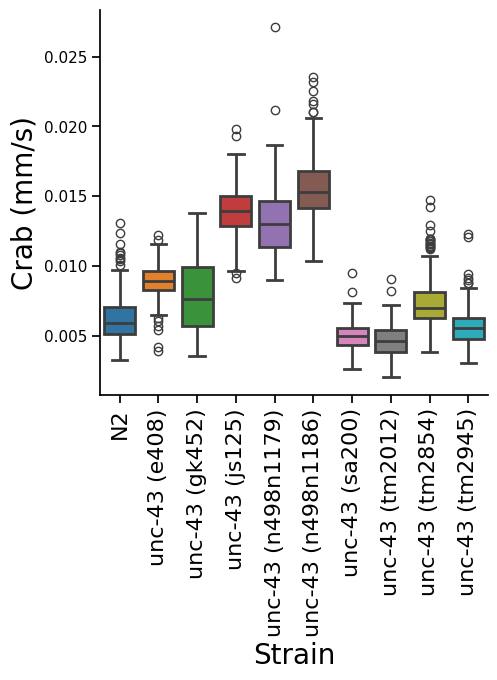

In [18]:
measure = measure_select.value

sns.set_context("notebook")
plt.figure(linewidth = 3)
plt.figure(figsize=(5,5))
plt.gca().xaxis.grid(False)
# sns.lineplot(data=TotalConcatenated,x='time_bin',y=measure,hue='Strain')
sns.boxplot(x="Strain", y=measure, data = unc43_baselinemeans, hue='Strain',hue_order=unc43_baselinemeans.Strain.unique(), linewidth=2,showfliers=True)
# sns.stripplot(x="Strain", y=measure, data = unc43_baselinemeans, hue='Strain',hue_order=strainlist, linewidth=2)
# sns.violinplot(x="Strain", y=measure, data = unc43_baselinemeans, hue='Strain', hue_order=strainlist,split=False, gap=.1, inner='point')
sns.despine()

plt.xlabel("Strain", fontsize=20)
plt.ylabel(f"{measure}", fontsize=20)
plt.ylabel("Crab (mm/s)", fontsize=20)
plt.xticks(rotation=90, fontsize=16)
# plt.title("Speed Trace")
# plt.ylim(top = 3)
# plt.ylim(bottom = 0)
# plt.xlim(left= 21)
# plt.xlim(right = 35.5)
# ax.legend(loc = 'upper right', fontsize = '10')
plt.savefig(f'unc43_{measure}.png', format='png', dpi=450, bbox_inches='tight')
plt.show()

## ANOVA and Post-hoc Tukey-HSD

In [53]:
aov = pg.anova(dv=measure, between='Strain', data=unc43_baselinemeans, detailed=True).round(4)
print(f"Anova of {measure}:")
print(aov)
print(type(aov))
aov.to_csv(f"{measure}_ANOVA.csv")

Anova of Crab:
   Source      SS    DF      MS          F  p-unc     np2
0  Strain  0.0473     9  0.0053  1957.4931    0.0  0.8164
1  Within  0.0106  3963  0.0000        NaN    NaN     NaN
<class 'pandas.core.frame.DataFrame'>


In [52]:
TukeyHSD = unc43_baselinemeans.pairwise_tukey(dv=measure,between='Strain').round(4)
print(type(TukeyHSD))
TukeyHSD.to_csv(f"{measure}_Tukey-HSD.csv")
TukeyHSD

<class 'pandas.core.frame.DataFrame'>


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,N2,unc-43_e408,0.0061,0.0088,-0.0027,0.0002,-14.0665,0.0000,-1.9539
1,N2,unc-43_gk452,0.0061,0.0077,-0.0016,0.0001,-16.7429,0.0000,-0.9742
2,N2,unc-43_js125,0.0061,0.0139,-0.0078,0.0001,-67.8505,0.0000,-5.5175
3,N2,unc-43_n498n1178,0.0061,0.0132,-0.0070,0.0001,-70.0594,0.0000,-4.4099
4,N2,unc-43_n498n1186,0.0061,0.0156,-0.0094,0.0001,-85.9488,0.0000,-5.9420
5,N2,unc-43_sa200,0.0061,0.0049,0.0012,0.0001,11.8902,0.0000,0.9430
6,N2,unc-43_tm2012,0.0061,0.0046,0.0015,0.0001,14.0251,0.0000,1.1698
7,N2,unc-43_tm2854,0.0061,0.0074,-0.0012,0.0001,-11.8890,0.0000,-0.8611
8,N2,unc-43_tm2945,0.0061,0.0056,0.0006,0.0001,6.6109,0.0000,0.4360
9,unc-43_e408,unc-43_gk452,0.0088,0.0077,0.0011,0.0002,5.3606,0.0000,0.4981


# Tap Metrics Tap Curves, then Box Plot

In [4]:
unc43_tap = pd.read_csv('unc43_tap_data.csv')
unc43_tap = unc43_tap.iloc[: , 1:].replace("N2 (N2)", "N2").replace("unc-43 (n498n1178)","unc-43 (n498n1179)")
# unc43_baseline = unc43_baseline[unc43_baseline.Allele != 'n498']

print(unc43_tap)
print(sorted(unc43_tap.Strain.unique()))

          time  dura   dist      prob     speed  plate      Date Plate_id  \
0      599.973  3.07  0.524  0.826087  0.170684    156  20230307  A0303aa   
1      609.969  2.40  0.456  0.769231  0.190000    156  20230307  A0303aa   
2      619.862  1.81  0.355  0.616667  0.196133    156  20230307  A0303aa   
3      629.905  2.15  0.413  0.402439  0.192093    156  20230307  A0303aa   
4      639.934  1.94  0.423  0.422222  0.218041    156  20230307  A0303aa   
...        ...   ...    ...       ...       ...    ...       ...      ...   
2117   859.965  1.36  0.259  0.343284  0.190441      9  20230522  C0518be   
2118   869.963  0.84  0.125  0.363636  0.148810      9  20230522  C0518be   
2119   879.917  1.01  0.180  0.375000  0.178218      9  20230522  C0518be   
2120   889.966  0.71  0.118  0.358209  0.166197      9  20230522  C0518be   
2121  1189.995  2.41  0.454  0.857143  0.188382      9  20230522  C0518be   

         Screen  taps        dataset    Gene  Allele           Strain  
0  

In [5]:
out1 = widgets.Output() #<- this is part of the code that helps display your graphs in tabs
out2 = widgets.Output()
out3 = widgets.Output()
out4 = widgets.Output()

tab = widgets.Tab(children = [out1, out2, out3, out4]) #<- more code to support tab display
tab.set_title(0, 'Probability')
tab.set_title(1, 'Distance')
tab.set_title(2, 'Duration')
tab.set_title(3, 'Speed')
display(tab)

plt.rcParams.update({'lines.markeredgewidth': 2})
sns.set_context("notebook")
# Probability
with out1:
    plt.figure(linewidth = 3) #<- Make your figure lines THICCCC for clean display (posters)
    plt.figure(figsize=(10,7)) #<- set your figure size (width, length)
    plt.gca().xaxis.grid(False) #<- gets rid of x-axis markers to make data look clean 
    ax = sns.pointplot(x="taps", #<- Here we use seaborn as our graphing package. 
                 y="prob",  
                 data = unc43_tap,
                 hue = 'Strain', #<- Here we use the extra column from step 6 to separate by group    
                 hue_order = sorted(unc43_tap.Strain.unique()),
                 errorbar = ('ci', 95), capsize=.25, linewidth=3) #<- Confidence interval. 95 = standard error
    sns.despine()
    for _,s in ax.spines.items():
        s.set_linewidth(3)
    plt.setp(ax.collections, alpha=.6) #for the markers
    plt.setp(ax.lines, alpha=.6)       #for the lines
    plt.xlabel("Taps", fontsize=20) #<- X-axis title
    plt.ylabel("Probability", fontsize=20) #<- Y-Axis title
    # plt.title(f"Probability of Tap Habituation") #<- Figure Title
    plt.ylim(0,1)
    ax.legend(title="", loc = 'upper left', bbox_to_anchor=(1,1),fontsize = '16') #<- location of your legend
    plt.savefig(f'Probability.png', format='png', dpi=450, bbox_inches='tight') #<- saves your file to your folder at certain DPI
    plt.show()

# Distance
with out2:
    plt.figure(linewidth = 3)
    plt.figure(figsize=(10,7))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                 y="dist", 
                 data = unc43_tap,
                 hue = 'Strain',
                 hue_order = sorted(unc43_tap.Strain.unique()),
                 errorbar = ('ci', 95), capsize=.25, linewidth=3)
    sns.despine()
    for _,s in ax.spines.items():
        s.set_linewidth(3)
    plt.setp(ax.collections, alpha=.6) #for the markers
    plt.setp(ax.lines, alpha=.6)       #for the lines
    plt.xlabel("Taps", fontsize = '20')
    plt.ylabel("Distance", fontsize = '20')
    # plt.title(f"Distance of Tap Habituation", fontsize = '16')
    plt.ylim(0,None)
    ax.legend(title="", loc = 'upper left', bbox_to_anchor=(1,1),fontsize = '16')
    plt.savefig(f'Distance.png', format='png', dpi=450, bbox_inches='tight')
    plt.show()

# Duration
with out3:
    plt.figure(linewidth = 3)
    plt.figure(figsize=(10,7))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                       y="dura", 
                       data = unc43_tap,
                       hue = 'Strain',
                       hue_order = sorted(unc43_tap.Strain.unique()),
                       errorbar = ('ci', 95), capsize=.25, linewidth=3)
    plt.setp(ax.collections, alpha=.6) #for the markers
    plt.setp(ax.lines, alpha=.6)       #for the lines
    plt.xlabel("Taps", fontsize = '20')
    plt.ylabel("Duration (s)", fontsize = '20')
    sns.despine()
    for _,s in ax.spines.items():
        s.set_linewidth(3)
    # plt.title(f"Duration of Tap Habituation", fontsize = '16')
    plt.ylim(0,None)
    ax.legend(title="", loc = 'upper left', bbox_to_anchor=(1,1),fontsize = '16')
    plt.savefig(f'Duration.png', format='png', dpi=450, bbox_inches='tight')
    plt.show()

# Speed
with out4:
    plt.figure(linewidth = 3)
    plt.figure(figsize=(10,7))
    plt.gca().xaxis.grid(False)
    ax = sns.pointplot(x="taps", 
                 y="speed", 
                 data = unc43_tap,
                 hue = 'Strain',
                 hue_order = sorted(unc43_tap.Strain.unique()),
                 errorbar = ('ci', 95), capsize=.25, linewidth=3) 
    sns.despine()
    for _,s in ax.spines.items():
        s.set_linewidth(3)
    plt.setp(ax.collections, alpha=.6) #for the markers
    plt.setp(ax.lines, alpha=.6)       #for the lines
    plt.xlabel("Taps", fontsize = '20')
    plt.ylabel("Speed (mm/s)", fontsize = '20')
    # plt.title(f"Speed of Tap Habituation", fontsize = '16')
    plt.ylim(0,None)
    ax.legend(title="", loc = 'upper left', bbox_to_anchor=(1,1),fontsize = '16')
    plt.savefig(f'Speed.png', format='png', dpi=450, bbox_inches='tight')
    plt.show()

In [7]:
firsttap = unc43_tap[unc43_tap.taps==1].reset_index(drop=True).replace("N2 (N2)", "N2")
firsttap

,time,dura,dist,prob,speed,plate,Date,Plate_id,Screen,taps,dataset,Gene,Allele,Strain
0,599.973,3.07,0.524,0.826087,0.170684,156,20230307,A0303aa,PD_Screen,1,N2,N2,N2,N2
1,599.964,3.22,0.767,0.934783,0.238199,157,20230307,C0303ab,PD_Screen,1,N2,N2,N2,N2
2,599.994,2.91,0.584,0.884615,0.200687,158,20230307,B0303ac,PD_Screen,1,N2,N2,N2,N2
3,599.958,2.99,0.607,0.886792,0.203010,159,20230307,A0303ad,PD_Screen,1,N2,N2,N2,N2
4,599.947,3.40,0.770,0.714286,0.226471,160,20230307,C0303ae,PD_Screen,1,N2,N2,N2,N2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,599.959,2.38,0.366,1.000000,0.153782,5,20230522,B0518ba,PD_Screen,1,unc-43_tm2945,unc-43,tm2945,unc-43 (tm2945)
65,599.925,3.12,0.558,0.878788,0.178846,6,20230522,C0518bb,PD_Screen,1,unc-43_tm2945,unc-43,tm2945,unc-43 (tm2945)
66,599.991,3.21,0.585,0.833333,0.182243,7,20230522,A0518bc,PD_Screen,1,unc-43_tm2945,unc-43,tm2945,unc-43 (tm2945)
67,599.968,3.11,0.563,0.962264,0.181029,8,20230522,B0518bd,PD_Screen,1,unc-43_tm2945,unc-43,tm2945,unc-43 (tm2945)


In [8]:
tap_measure_select=widgets.Dropdown(
            options=list(unc43_tap),
            value=list(unc43_tap)[1],
            description='Pick a measure:',
            disabled=False)
display(tap_measure_select)

Dropdown(description='Pick a measure:', index=1, options=('time', 'dura', 'dist', 'prob', 'speed', 'plate', 'D…

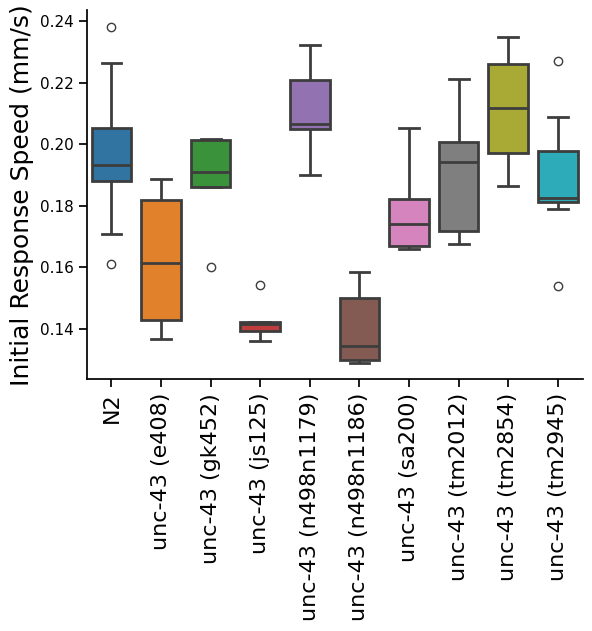

In [27]:
tap_measure = tap_measure_select.value

sns.set_context("notebook")
plt.figure(linewidth = 3)
# plt.figure(figsize=(12,7))
plt.gca().xaxis.grid(False)

# sns.lineplot(data=TotalConcatenated,x='time_bin',y=measure,hue='Strain')
sns.boxplot(x="Strain", y=tap_measure, data = firsttap, hue='Strain',hue_order=sorted(firsttap.Strain.unique()), linewidth=2)
sns.despine()
# sns.violinplot(x="Strain", y=measure, data = unc43_baselinemeans, hue='Strain', hue_order=strainlist,split=False, gap=.1, inner='point')
# sns.swarmplot(x="roundedtimebin", y=measure, data = every5min, hue='Strain',hue_order=["N2","miz304","miz306"], dodge=True)


plt.xlabel("", fontsize=20)
plt.ylabel("Initial Response Speed (mm/s)", fontsize=18)
plt.xticks(rotation=90, fontsize=16)
plt.savefig(f'unc43_initial_{tap_measure}.png', format='png', dpi=450, bbox_inches='tight')
plt.show()

### statistical analysis (ANOVA and Tukey-HSD post-hoc)

In [77]:
aov = pg.anova(dv=tap_measure, between='Strain', data=firsttap, detailed=True).round(4)
print(f"Anova of {tap_measure}:")
print(aov)
print(type(aov))
aov.to_csv(f"initial_{tap_measure}_ANOVA.csv")

Anova of speed:
   Source      SS  DF      MS        F  p-unc     np2
0  Strain  0.0322   9  0.0036  10.6888    0.0  0.6198
1  Within  0.0197  59  0.0003      NaN    NaN     NaN
<class 'pandas.core.frame.DataFrame'>


In [78]:
TukeyHSD = firsttap.pairwise_tukey(dv=tap_measure,between='Strain').round(4)
print(type(TukeyHSD))
TukeyHSD.to_csv(f"initial_{tap_measure}_Tukey-HSD.csv")
TukeyHSD

<class 'pandas.core.frame.DataFrame'>


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,N2 (N2),unc-43 (e408),0.1975,0.1622,0.0353,0.0091,3.8659,0.0097,1.7691
1,N2 (N2),unc-43 (gk452),0.1975,0.1880,0.0095,0.0091,1.0407,0.9883,0.5048
2,N2 (N2),unc-43 (js125),0.1975,0.1426,0.0549,0.0091,6.0082,0.0000,3.1215
3,N2 (N2),unc-43 (n498n1178),0.1975,0.2109,-0.0134,0.0091,-1.4644,0.9005,-0.7158
4,N2 (N2),unc-43 (n498n1186),0.1975,0.1403,0.0572,0.0091,6.2610,0.0000,3.1367
5,N2 (N2),unc-43 (sa200),0.1975,0.1788,0.0187,0.0091,2.0440,0.5727,0.9993
6,N2 (N2),unc-43 (tm2012),0.1975,0.1910,0.0065,0.0091,0.7073,0.9994,0.3272
7,N2 (N2),unc-43 (tm2854),0.1975,0.2112,-0.0137,0.0091,-1.5026,0.8858,-0.7097
8,N2 (N2),unc-43 (tm2945),0.1975,0.1899,0.0076,0.0073,1.0408,0.9883,0.3869
9,unc-43 (e408),unc-43 (gk452),0.1622,0.1880,-0.0258,0.0116,-2.2335,0.4465,-1.1517


## Final Response Statistics

In [9]:
last3tap = unc43_tap[unc43_tap.taps.isin([28,29,30])].reset_index(drop=True).replace("N2 (N2)", "N2")
last3tap

,time,dura,dist,prob,speed,plate,Date,Plate_id,Screen,taps,dataset,Gene,Allele,Strain
0,869.923,1.69,0.294,0.208333,0.173964,156,20230307,A0303aa,PD_Screen,28,N2,N2,N2,N2
1,879.937,1.83,0.319,0.310000,0.174317,156,20230307,A0303aa,PD_Screen,29,N2,N2,N2,N2
2,889.959,1.25,0.208,0.203883,0.166400,156,20230307,A0303aa,PD_Screen,30,N2,N2,N2,N2
3,869.879,0.88,0.138,0.140000,0.156818,157,20230307,C0303ab,PD_Screen,28,N2,N2,N2,N2
4,879.995,1.21,0.260,0.228070,0.214876,157,20230307,C0303ab,PD_Screen,29,N2,N2,N2,N2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,879.960,0.85,0.136,0.366197,0.160000,8,20230522,B0518bd,PD_Screen,29,unc-43_tm2945,unc-43,tm2945,unc-43 (tm2945)
201,889.960,0.89,0.161,0.333333,0.180899,8,20230522,B0518bd,PD_Screen,30,unc-43_tm2945,unc-43,tm2945,unc-43 (tm2945)
202,869.963,0.84,0.125,0.363636,0.148810,9,20230522,C0518be,PD_Screen,28,unc-43_tm2945,unc-43,tm2945,unc-43 (tm2945)
203,879.917,1.01,0.180,0.375000,0.178218,9,20230522,C0518be,PD_Screen,29,unc-43_tm2945,unc-43,tm2945,unc-43 (tm2945)


In [10]:
last3tapmeans=last3tap.groupby(['Date','Plate_id','Screen','dataset','Gene','Allele','Strain'],as_index=False).mean(numeric_only=True)
last3tapmeans

,Date,Plate_id,Screen,dataset,Gene,Allele,Strain,time,dura,dist,prob,speed,plate,taps
0,20230307,A0303aa,PD_Screen,N2,N2,N2,N2,879.939667,1.590000,0.273667,0.240739,0.171560,156.0,29.0
1,20230307,A0303ad,PD_Screen,N2,N2,N2,N2,879.982667,1.333333,0.274667,0.209844,0.206076,159.0,29.0
2,20230307,A0303bb,PD_Screen,unc-43_sa200,unc-43,sa200,unc-43 (sa200),879.926667,2.003333,0.285333,0.181087,0.142396,2.0,29.0
3,20230307,A0303be,PD_Screen,unc-43_sa200,unc-43,sa200,unc-43 (sa200),879.931667,1.170000,0.161667,0.195544,0.138965,5.0,29.0
4,20230307,A0303cc,PD_Screen,unc-43_js125,unc-43,js125,unc-43 (js125),879.963000,0.766667,0.105667,0.245695,0.137599,3.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,20230522,B0518ba,PD_Screen,unc-43_tm2945,unc-43,tm2945,unc-43 (tm2945),879.978333,0.800000,0.130667,0.358883,0.161574,5.0,29.0
65,20230522,B0518bd,PD_Screen,unc-43_tm2945,unc-43,tm2945,unc-43 (tm2945),879.949000,0.890000,0.150333,0.371272,0.168830,8.0,29.0
66,20230522,C0518ac,PD_Screen,N2,N2,N2,N2,879.936000,1.146667,0.230333,0.256888,0.199147,195.0,29.0
67,20230522,C0518bb,PD_Screen,unc-43_tm2945,unc-43,tm2945,unc-43 (tm2945),879.973333,0.730000,0.138667,0.394063,0.182391,6.0,29.0


In [11]:
tap_measure_select=widgets.Dropdown(
            options=list(unc43_tap),
            value=list(unc43_tap)[1],
            description='Pick a measure:',
            disabled=False)
display(tap_measure_select)

Dropdown(description='Pick a measure:', index=1, options=('time', 'dura', 'dist', 'prob', 'speed', 'plate', 'D…

In [12]:
print(sorted(last3tapmeans.Strain.unique()))

['N2', 'unc-43 (e408)', 'unc-43 (gk452)', 'unc-43 (js125)', 'unc-43 (n498n1179)', 'unc-43 (n498n1186)', 'unc-43 (sa200)', 'unc-43 (tm2012)', 'unc-43 (tm2854)', 'unc-43 (tm2945)']


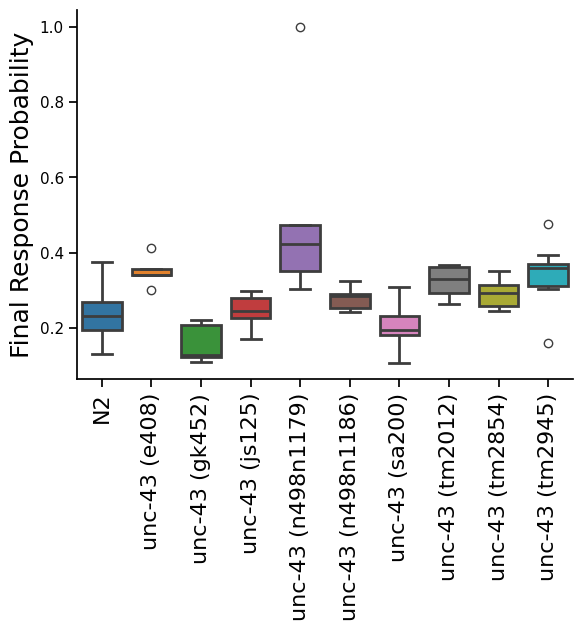

In [13]:
tap_measure = tap_measure_select.value

sns.set_context("notebook")
plt.figure(linewidth = 3)
# plt.figure(figsize=(12,7))
plt.gca().xaxis.grid(False)

# sns.lineplot(data=TotalConcatenated,x='time_bin',y=measure,hue='Strain')
sns.boxplot(x="Strain", y=tap_measure, data = last3tapmeans.sort_values(by=['Strain']), hue='Strain',hue_order=sorted(last3tapmeans.Strain.unique()), linewidth=2)
sns.despine()
# sns.violinplot(x="Strain", y=measure, data = unc43_baselinemeans, hue='Strain', hue_order=strainlist,split=False, gap=.1, inner='point')
# sns.swarmplot(x="roundedtimebin", y=measure, data = every5min, hue='Strain',hue_order=["N2","miz304","miz306"], dodge=True)


plt.xlabel("", fontsize=20)
plt.ylabel("Final Response Probability", fontsize=18)
plt.xticks(rotation=90, fontsize=16)
plt.savefig(f'unc43_final_{tap_measure}.png', format='png', dpi=450, bbox_inches='tight')
plt.show()

### statistical analysis (ANOVA and Tukey-HSD post-hoc)

In [91]:
aov = pg.anova(dv=tap_measure, between='Strain', data=last3tapmeans, detailed=True).round(4)
print(f"Anova of {tap_measure}:")
print(aov)
print(type(aov))
aov.to_csv(f"final_{tap_measure}_ANOVA.csv")

Anova of speed:
   Source      SS  DF      MS       F  p-unc     np2
0  Strain  0.0364   9  0.0040  5.4977    0.0  0.4561
1  Within  0.0434  59  0.0007     NaN    NaN     NaN
<class 'pandas.core.frame.DataFrame'>


In [92]:
TukeyHSD = last3tapmeans.pairwise_tukey(dv=tap_measure,between='Strain').round(4)
print(type(TukeyHSD))
TukeyHSD.to_csv(f"final_{tap_measure}_Tukey-HSD.csv")
TukeyHSD

<class 'pandas.core.frame.DataFrame'>


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,N2 (N2),unc-43 (e408),0.1926,0.1527,0.0399,0.0136,2.9419,0.1170,1.4761
1,N2 (N2),unc-43 (gk452),0.1926,0.1786,0.0139,0.0136,1.0267,0.9893,0.5708
2,N2 (N2),unc-43 (js125),0.1926,0.1170,0.0755,0.0136,5.5718,0.0000,3.1559
3,N2 (N2),unc-43 (n498n1178),0.1926,0.1589,0.0337,0.0136,2.4830,0.2988,0.9660
4,N2 (N2),unc-43 (n498n1186),0.1926,0.1351,0.0574,0.0136,4.2349,0.0030,2.4343
5,N2 (N2),unc-43 (sa200),0.1926,0.1542,0.0383,0.0136,2.8270,0.1513,1.5875
6,N2 (N2),unc-43 (tm2012),0.1926,0.1749,0.0176,0.0136,1.2990,0.9500,0.6649
7,N2 (N2),unc-43 (tm2854),0.1926,0.1909,0.0017,0.0136,0.1222,1.0000,0.0603
8,N2 (N2),unc-43 (tm2945),0.1926,0.1724,0.0201,0.0109,1.8487,0.7020,0.8621
9,unc-43 (e408),unc-43 (gk452),0.1527,0.1786,-0.0260,0.0172,-1.5141,0.8811,-0.9218


## Spontaneous Recovery Measure

In [36]:
recovtap = unc43_tap[unc43_tap.taps==31].reset_index(drop=True).replace("N2 (N2)", "N2")
recovtap

,time,dura,dist,prob,speed,plate,Date,Plate_id,Screen,taps,dataset,Gene,Allele,Strain
0,1189.937,2.62,0.530,0.642857,0.202290,156,20230307,A0303aa,PD_Screen,31,N2,N2,N2,N2
1,1189.991,3.40,0.820,0.906977,0.241176,157,20230307,C0303ab,PD_Screen,31,N2,N2,N2,N2
2,1189.963,2.93,0.572,0.562500,0.195222,158,20230307,B0303ac,PD_Screen,31,N2,N2,N2,N2
3,1189.972,1.97,0.429,0.704545,0.217767,159,20230307,A0303ad,PD_Screen,31,N2,N2,N2,N2
4,1189.972,3.99,1.052,0.789474,0.263659,160,20230307,C0303ae,PD_Screen,31,N2,N2,N2,N2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1189.989,1.52,0.262,0.864865,0.172368,5,20230522,B0518ba,PD_Screen,31,unc-43_tm2945,unc-43,tm2945,unc-43 (tm2945)
65,1189.943,3.22,0.639,0.906977,0.198447,6,20230522,C0518bb,PD_Screen,31,unc-43_tm2945,unc-43,tm2945,unc-43 (tm2945)
66,1189.984,2.69,0.492,0.853659,0.182900,7,20230522,A0518bc,PD_Screen,31,unc-43_tm2945,unc-43,tm2945,unc-43 (tm2945)
67,1189.971,2.49,0.481,0.837838,0.193173,8,20230522,B0518bd,PD_Screen,31,unc-43_tm2945,unc-43,tm2945,unc-43 (tm2945)


In [37]:
tap_measure_select=widgets.Dropdown(
            options=list(unc43_tap),
            value=list(unc43_tap)[1],
            description='Pick a measure:',
            disabled=False)
display(tap_measure_select)

Dropdown(description='Pick a measure:', index=1, options=('time', 'dura', 'dist', 'prob', 'speed', 'plate', 'D…

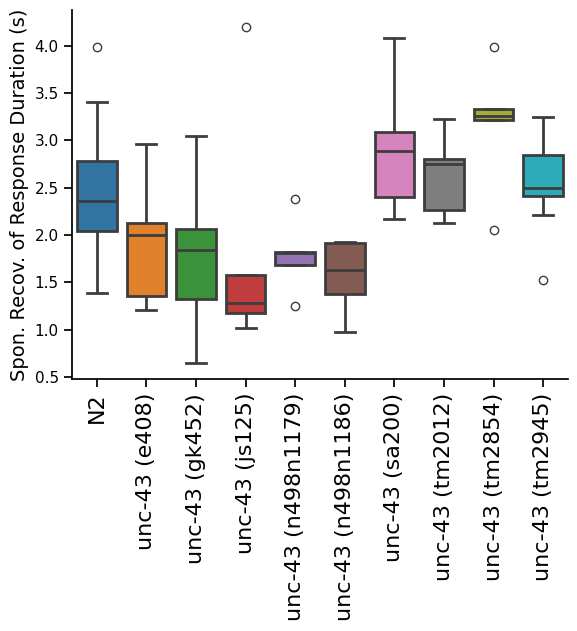

In [40]:
tap_measure = tap_measure_select.value

sns.set_context("notebook")
plt.figure(linewidth = 3)
# plt.figure(figsize=(12,7))
plt.gca().xaxis.grid(False)

# sns.lineplot(data=TotalConcatenated,x='time_bin',y=measure,hue='Strain')
sns.boxplot(x="Strain", y=tap_measure, data = recovtap.sort_values(by=['Strain']), hue='Strain',hue_order=sorted(recovtap.Strain.unique()), linewidth=2)
sns.despine()
# sns.stripplot(x="Strain", y=tap_measure, data = recovtap.sort_values(by=['Strain']), hue='Strain',hue_order=sorted(recovtap.Strain.unique()), linewidth=2)
# sns.violinplot(x="Strain", y=measure, data = unc43_baselinemeans, hue='Strain', hue_order=strainlist,split=False, gap=.1, inner='point')


# plt.ylim(top=1.1)
plt.xlabel("", fontsize=20)
plt.ylabel("Spon. Recov. of Response Duration (s)", fontsize=14)
plt.xticks(rotation=90, fontsize=16)
plt.savefig(f'unc43_recov_{tap_measure}.png', format='png', dpi=450, bbox_inches='tight')
plt.show()

### ### statistical analysis (ANOVA and Tukey-HSD post-hoc)

In [107]:
aov = pg.anova(dv=tap_measure, between='Strain', data=recovtap, detailed=True).round(4)
print(f"Anova of {tap_measure}:")
print(aov)
print(type(aov))
aov.to_csv(f"recov_{tap_measure}_ANOVA.csv")

Anova of dura:
   Source       SS  DF      MS       F   p-unc     np2
0  Strain  14.3763   9  1.5974  3.1388  0.0037  0.3238
1  Within  30.0253  59  0.5089     NaN     NaN     NaN
<class 'pandas.core.frame.DataFrame'>


In [108]:
TukeyHSD = recovtap.pairwise_tukey(dv=tap_measure,between='Strain').round(4)
print(type(TukeyHSD))
TukeyHSD.to_csv(f"recov_{tap_measure}_Tukey-HSD.csv")
TukeyHSD

<class 'pandas.core.frame.DataFrame'>


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,N2 (N2),unc-43 (e408),2.447,1.928,0.519,0.3567,1.4551,0.9039,0.7161
1,N2 (N2),unc-43 (gk452),2.447,1.782,0.665,0.3567,1.8644,0.6920,0.8723
2,N2 (N2),unc-43 (js125),2.447,1.850,0.597,0.3567,1.6737,0.8053,0.6834
3,N2 (N2),unc-43 (n498n1178),2.447,1.788,0.659,0.3567,1.8476,0.7028,0.9667
4,N2 (N2),unc-43 (n498n1186),2.447,1.560,0.887,0.3567,2.4868,0.2968,1.3020
5,N2 (N2),unc-43 (sa200),2.447,2.926,-0.479,0.3567,-1.3429,0.9390,-0.6537
6,N2 (N2),unc-43 (tm2012),2.447,2.630,-0.183,0.3567,-0.5131,1.0000,-0.2667
7,N2 (N2),unc-43 (tm2854),2.447,3.168,-0.721,0.3567,-2.0214,0.5880,-0.9946
8,N2 (N2),unc-43 (tm2945),2.447,2.560,-0.113,0.2863,-0.3946,1.0000,-0.1677
9,unc-43 (e408),unc-43 (gk452),1.928,1.782,0.146,0.4512,0.3236,1.0000,0.1649


# Heatmap

In [41]:
unc43_heatmap = pd.read_csv('unc43_tstat_heatmap.csv').rename(columns={'dataset':'Strain'})
# unc43_heatmap = unc43_heatmap.iloc[: , 1:]
# unc43_baseline = unc43_baseline[unc43_baseline.Allele != 'n498']

print(unc43_heatmap)
print(sorted(unc43_heatmap.Strain.unique()))

             Strain  Morphwidth   Midline      Area  Instantaneous Speed  \
0       unc-43_e408   -0.902485 -1.005679 -0.858709            -0.246309   
1      unc-43_gk452   -0.120218 -0.117874 -0.093426             0.403481   
2      unc-43_js125    0.423683 -2.548541 -1.036223             0.158600   
3  unc-43_n498n1178   -1.025806 -1.879739 -1.368658             1.183364   
4  unc-43_n498n1186    0.087630 -1.531519 -1.011405             1.263553   
5      unc-43_sa200    0.271759 -0.110100  0.065350            -0.860698   
6     unc-43_tm2012   -0.682250 -0.129617 -0.223743            -0.522810   
7     unc-43_tm2854   -0.068942 -0.063647  0.114434             0.806430   
8     unc-43_tm2945   -0.421728 -0.371556 -0.363167            -0.215733   

   Interval Speed  Angular Speed      Bias  Aspect Ratio      Kink  ...  \
0       -0.100175       1.663462 -0.718075      2.138345  2.747789  ...   
1        0.422018       0.451823  0.489003      0.120254 -0.288572  ...   
2        0.352

In [42]:
unc43_heatmap=unc43_heatmap.replace({'unc-43_e408':'unc-43 (e408)', 
                                    'unc-43_gk452':'unc-43 (gk452)',
                                    'unc-43_js125':'unc-43 (js125)',
                                    'unc-43_n498n1178':'unc-43 (n498n1179)',
                                    'unc-43_n498n1186':'unc-43 (n498n1186)',
                                    'unc-43_sa200':'unc-43 (sa200)',
                                    'unc-43_tm2012':'unc-43 (tm2012)',
                                    'unc-43_tm2854':'unc-43 (tm2854)',
                                    'unc-43_tm2945':'unc-43 (tm2945)'})

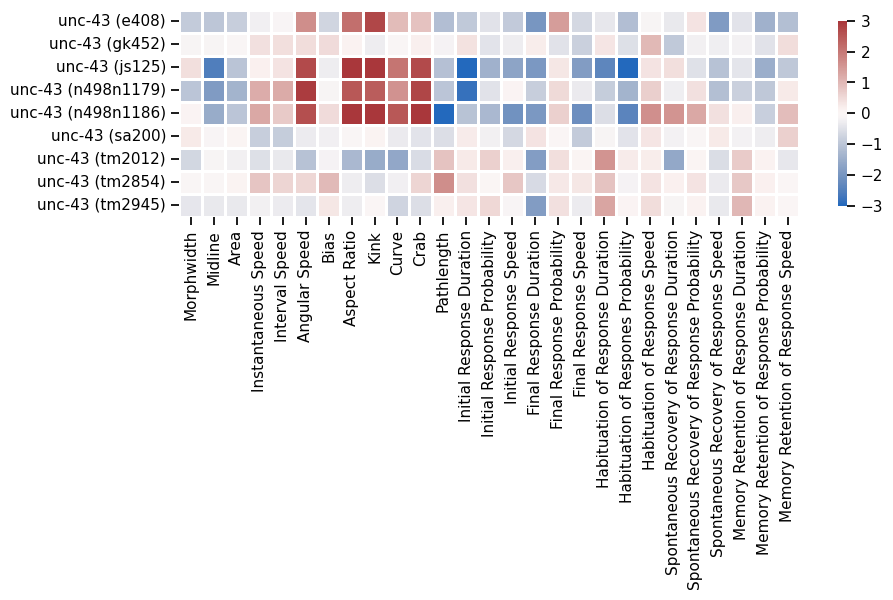

In [43]:
sns.set_context('notebook')
plt.figure(figsize=(10,8))
ax = sns.heatmap(data=unc43_heatmap.set_index('Strain'), 
                 annot=False, 
                 linewidth=1, 
                 square=True, 
                 cmap="vlag", 
                 center=0, 
                 vmax=3,
                 vmin=-3, 
                 xticklabels=1,
                 yticklabels=1,
                 cbar_kws={"shrink": .3})
ax.set_ylabel('', fontsize=18)    
ax.set_xlabel('', fontsize=18)
plt.savefig('unc43_heatmap.png', format='png', dpi=450, bbox_inches = "tight")
plt.show()

In [ ]:
PD_final_taps=PD_final_taps.rename(columns={"dura": "final_dura", "prob": "final_prob", "speed": "final_speed"}, errors="raise")
PD_first_tap=PD_first_tap.rename(columns={"dura": "init_dura", "prob": "init_prob", "speed": "init_speed"}, errors="raise")
print(PD_final_taps)
print(PD_first_tap)

In [ ]:
PD_habit_levels = pd.merge(PD_first_tap, PD_final_taps, on =['dataset','plate','Gene','Allele'], how ='left')
PD_habit_levels = PD_habit_levels.dropna()
print(PD_habit_levels)

In [ ]:
PD_habit_levels['habit_dura']=PD_habit_levels.init_dura-PD_habit_levels.final_dura
PD_habit_levels['habit_prob']=PD_habit_levels.init_prob-PD_habit_levels.final_prob
PD_habit_levels['habit_speed']=PD_habit_levels.init_speed-PD_habit_levels.final_speed
PD_habit_levels=PD_habit_levels.drop(columns=['time_x','time_y','taps_x','taps_y','dist_x','dist_y'])
# print(PD_habit_levels)
# print(PD_final_taps)
# print(PD_first_tap)
# print(PD_recov_taps)

In [ ]:
PD_recov_taps=PD_recov_taps.rename(columns={"dura": "recov_dura", "prob": "recov_prob", "speed":"recov_speed"})
PD_habituation = pd.merge(PD_habit_levels, PD_recov_taps, on =['dataset','plate','Gene','Allele'], how ='left')
PD_habituation = PD_habituation.dropna()
print(PD_habituation)